In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [2]:
df_TFD= pd.read_csv('../../datasets/TitanicFromDisaster_train.csv')
df_TFD.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

## 8월 18일 quest
- 목표변수: Survived
- 설명변수: Pclass, Sex, Age
    ⇒ 설명변수들의 인사이트 찾기

In [3]:
df_TFD.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df_SPSA = df_TFD[['Survived', 'Pclass', 'Sex', 'Age']]
df_SPSA.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

In [5]:
df_SPSA = df_SPSA.dropna()

In [6]:
df_SPSA.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

#### 목표: Survived, 설명: Sex
    - 분석 내용: 성별에 따른 생존 여부는?
            -- 귀무가설: 성별에 따른 생존 여부는 관계 없음
            -- 대립가설: 성별에 따른 생존 여부는 관계 있음
        ⇒ 분석 결론 
            ** 범주-범주로 비교_chi2_contingency 비교 
            -- 통계결론: p-value가 1.6716678441395297e-46, 0.05보다 작으므로 대립가설이 참. 
            -- 사실결론: 성별에 따른 생존 여부는 관계가 있다. 
                    - count그래프로 확인
        

df_SPSA_SS = df_SPSA[['Survived', 'Sex']]
df_SPSA_SS

In [10]:
df_SPSA_SS_pivot = pd.pivot_table(data=df_SPSA_SS, index=['Sex'], columns=['Survived'], aggfunc=len)
df_SPSA_SS_pivot

Survived,0,1
Sex,,
female,64,197
male,360,93


In [12]:
stats.chi2_contingency(observed=df_SPSA_SS_pivot, correction=True)

Chi2ContingencyResult(statistic=205.02582752855906, pvalue=1.6716678441395297e-46, dof=1, expected_freq=array([[154.99159664, 106.00840336],
       [269.00840336, 183.99159664]]))

##### count 그래프

In [14]:
df_SPSA_SS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  714 non-null    int64 
 1   Sex       714 non-null    object
dtypes: int64(1), object(1)
memory usage: 16.7+ KB


In [17]:
df_SPSA_SS['Survived'].astype(object)

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: object

In [18]:
df_SPSA_SS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  714 non-null    object
 1   Sex       714 non-null    object
dtypes: object(2)
memory usage: 16.7+ KB


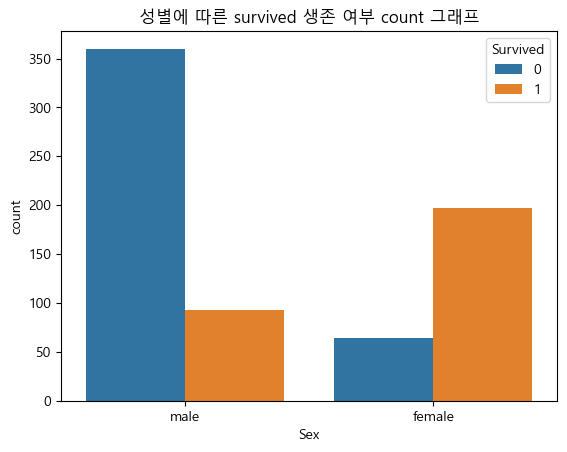

In [24]:
sns.countplot(df_SPSA_SS, x='Sex',hue='Survived')
plt.title('성별에 따른 survived 생존 여부 count 그래프')
plt.show()

#### 목표: Survived, 설명: Pclass
    - 분석 내용: 선실 등급에 따른 생존 여부는?
            -- 귀무가설: 선실 등급에 따른 생존 여부는 관계 없음
            -- 대립가설: 선실 등급에 따른 생존 여부는 관계 있음
        ⇒ 분석 결론 
            ** 범주-범주로 비교_chi2_contingency 비교 
            -- 통계결론: p-value가 6.709861749756909e-21, 대립 가설 참. 
            -- 사실결론: 선실 등급에 따른 생존 여부는 관계가 있다. 이를 보기 위해 count그래프 비교. 
        

In [25]:
df_SPSA_SP = df_SPSA[['Survived', 'Pclass']]
df_SPSA_SP

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
885,0,3
886,0,2
887,1,1
889,1,1


In [26]:
df_SPSA_SP_pivot = pd.pivot_table(data=df_SPSA_SP, index=['Pclass'], columns=['Survived'], aggfunc=len)
df_SPSA_SP_pivot

Survived,0,1
Pclass,,
1,64,122
2,90,83
3,270,85


In [27]:
stats.chi2_contingency(observed=df_SPSA_SP_pivot, correction=True)

Chi2ContingencyResult(statistic=92.90141721143321, pvalue=6.709861749756909e-21, dof=2, expected_freq=array([[110.45378151,  75.54621849],
       [102.73389356,  70.26610644],
       [210.81232493, 144.18767507]]))

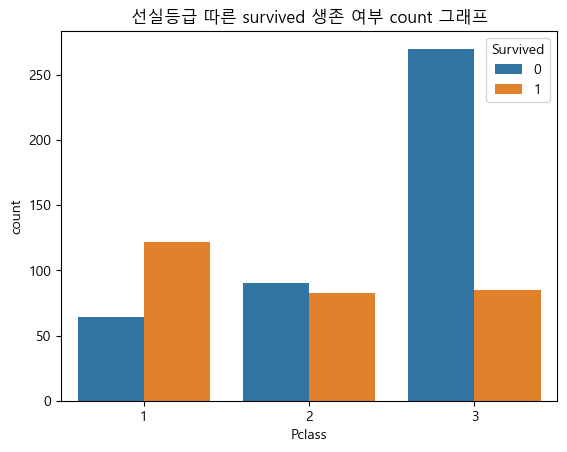

In [29]:
sns.countplot(df_SPSA_SP, x='Pclass',hue='Survived')
plt.title('선실등급 따른 survived 생존 여부 count 그래프')
plt.show()